In [1]:
import _2x2_Structure_Creator as str_cr
import _2x2_Hamiltonian_Creator as H_cr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from scipy.linalg import eig, eigh
from scipy.sparse.linalg import eigs, eigsh
from numpy import linalg as LA



#-------------------------------------------------------------
#-------------------------------------------------------------
#-------------------------------------------------------------


plt.rcParams['xtick.labelsize']     = 20
plt.rcParams['ytick.labelsize']     = 20
plt.rcParams['axes.linewidth']      = 2
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["xtick.major.size"]    =  10
plt.rcParams["xtick.minor.size"]    =  5
plt.rcParams["xtick.major.width"]   =  2
plt.rcParams["xtick.minor.width"]   =  2
plt.rcParams["xtick.direction"]     =  'in'
plt.rcParams["ytick.minor.visible"] =  True
plt.rcParams["ytick.major.size"]    =  10
plt.rcParams["ytick.minor.size"]    =  5
plt.rcParams["ytick.major.width"]   =  2

plt.rcParams["ytick.minor.width"]   =  2
plt.rcParams["ytick.direction"]     =  'in'
plt.rcParams['text.usetex']         = True
plt.rcParams['legend.frameon']      = False




#-------------------------------------------------------------
#-------------------------------------------------------------
#-------------------------------------------------------------




# Constants and Parameters
q    = 1.602176e-19 #C
m_e  = 9.1093826E-31 #kg
hbar = 1.054571817e-34 #J s

/home/carlos-bravel/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


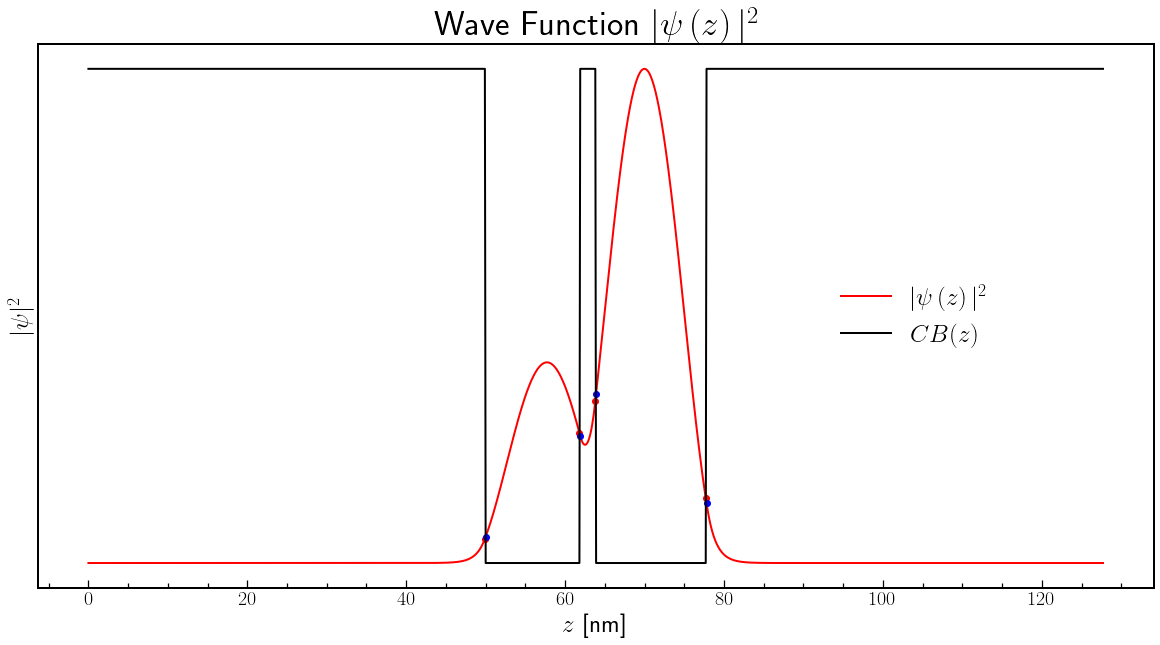

In [15]:
CQW =[

             [ 50.0, 'AlGaAs',   0.15,  'B'],
             [ 11.9, 'GaAs',     0.00,  'W'],
             [ 2.0, 'AlGaAs',   0.15,  'B'],
             [ 13.9, 'GaAs',     0.00,  'W'],
             [ 50.0, 'AlGaAs',   0.15,  'B']
             ]
Temp=19.0
dz=0.1

beta=0
alpha=0

H=H_cr.cr_Hamiltonian(Temp,dz,CQW,alpha,beta,(0),(0))

Energy,WF=LA.eigh(H, UPLO='U')
z=str_cr.cr_Zaxis(Temp,dz,CQW)
CB=str_cr.cr_CB(Temp,dz,CQW)
interf=str_cr.cr_InterfacesIndex(dz,CQW)
N=z.size
Wf0=np.zeros((N),dtype=complex)
Wf1=np.zeros((N),dtype=complex)


for i in range(N):
    Wf0[i]=WF[2*i,0]
    Wf1[i]=WF[2*i+1,0]


aux=np.conjugate(Wf0[:])*(Wf0[:])
c=((CB.max())/q)/(aux.max())


fig = plt.figure(figsize=(20,10))
spec = gridspec.GridSpec(1,1)
ax  = fig.add_subplot(spec[0])

ax.plot(z*1e9,np.conjugate(Wf0[:])*(Wf0[:])*c, lw = 2, color = 'r',label = r'$ \vert \psi\left(z\right) \vert^{2}$')

for i in range(int((interf.size)/2)):
    ro=interf[2*i]
    bo=interf[2*i+1]
    ax.plot((z[ro])*1e9,np.conjugate(Wf0[ro])*(Wf0[ro])*c, 'ro')
    ax.plot((z[bo])*1e9,np.conjugate(Wf0[bo])*(Wf0[bo])*c, 'bo')


ax.plot(z*1e9,(CB)/q, lw = 2,ls='-', color = 'k',label = r'$CB(z)$')
ax.set_title(r"Wave Function $\vert \psi\left(z\right)\vert^{2}$", fontsize=35)
ax.set_xlabel('$z$ [nm]',fontsize = 25)
ax.set_ylabel(r'$ \vert \psi \vert^{2}$',fontsize =25)
ax.minorticks_on()
ax.ticklabel_format(style='sci', axis='y')
ax.tick_params(axis='both',which='minor',direction='in',length=5,width=1.25,labelsize=20)
ax.tick_params(axis='both',which='major',direction='in',length=8,width=1.25,labelsize=20)
ax.legend(fontsize=25,frameon=False,loc=2,bbox_to_anchor=(0.7,0.6))
ax.tick_params(axis='y',which='both',right=False,left=False,labelright=False,labelleft=False)

plt.savefig('WF_Example.pdf',dpi=300,bbox_inches='tight', pad_inches=0.1) 
plt.show()

In [5]:
sample="Example"

CQW =[

             [ 50.0, 'AlGaAs',   0.15,  'B'],
             [ 11.9, 'GaAs',     0.00,  'W'],
             [ 2.0, 'AlGaAs',   0.15,  'B'],
             [ 13.9, 'GaAs',     0.00,  'W'],
             [ 50.0, 'AlGaAs',   0.15,  'B']
             ]
Temp=19.0
dz=0.1

beta=0
alpha=0

H=H_cr.cr_Hamiltonian(Temp,dz,CQW,alpha,beta,(0),(0))
z=str_cr.cr_Zaxis(Temp,dz,CQW)
CB=str_cr.cr_CB(Temp,dz,CQW)
interf=str_cr.cr_InterfacesIndex(dz,CQW)


Energy,WF=LA.eigh(H, UPLO='U')

N=z.size
Wf0=np.zeros((N),dtype=complex)


for i in range(N):
    Wf0[i]=WF[2*i,0]




funcion=np.zeros((N),dtype=complex)
funcionp=np.zeros((N),dtype=complex)
funcionpp=np.zeros((N),dtype=complex)

funcion[:]=Wf0[:]
aa=np.trapz((np.conjugate(funcion[:]))*((funcion[:])),z[:])
aa=np.sqrt(aa)
funcion[:]=(funcion[:])/aa

funcionp[:]=np.gradient(funcion[:],z[:])
funcionpp[:]=np.gradient(funcionp[:],z[:])

k2=np.trapz(np.conjugate(funcion[:])*(funcionpp[:]),z[:])
beta=np.real((-k2)*(24.5)*(q)*(1e-30))


suma=0
for i in range(int((interf.size)/2)):
    suma+=(CB[interf[2*i+1]]-CB[interf[2*i]])*(((np.conjugate(funcion[interf[2*i]]))*((funcion[interf[2*i]]))+np.conjugate(funcion[interf[2*i+1]])*(funcion[interf[2*i+1]]))/2)*(6.843557043074228e-16)
    

alpha=np.real(suma)


Kas=51
deltaKas=(1.1e7)/(Kas-1)

kasEje=np.zeros(Kas)
for i in range(Kas):
    kasEje[i]=i*deltaKas


#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
angle=(1*(np.pi))/(4)


EZMas=np.zeros(Kas)
EZMenos=np.zeros(Kas)

for i in range(Kas):
    H=H_cr.cr_Hamiltonian(Temp,dz,CQW,alpha,beta,(kasEje[i])*(np.cos(angle)),(kasEje[i])*(np.sin(angle)))
    Energy,WF=LA.eigh(H, UPLO='U')
    
    EZMas[i]=np.real(Energy[0])
    EZMenos[i]=np.real(Energy[1])

file = open("%s_ZMas_110_Dispersion.dat"%(sample),"w")
for i in range(kasEje.size):
    file.write("%e\t%e\n"%(kasEje[i],EZMas[i]))
file.close()

file = open("%s_ZMenos_110_Dispersion.dat"%(sample),"w")
for i in range(kasEje.size):
    file.write("%e\t%e\n"%((kasEje[i],EZMenos[i])))
file.close()


#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------

#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
angle=(3*(np.pi))/(4)


EZMas=np.zeros(Kas)
EZMenos=np.zeros(Kas)

for i in range(Kas):
    H=H_cr.cr_Hamiltonian(Temp,dz,CQW,alpha,beta,(kasEje[i])*(np.cos(angle)),(kasEje[i])*(np.sin(angle)))
    Energy,WF=LA.eigh(H, UPLO='U')
    
    EZMas[i]=np.real(Energy[0])
    EZMenos[i]=np.real(Energy[1])

file = open("%s_ZMas_-110_Dispersion.dat"%(sample),"w")
for i in range(kasEje.size):
    file.write("%e\t%e\n"%(kasEje[i],EZMas[i]))
file.close()

file = open("%s_ZMenos_-110_Dispersion.dat"%(sample),"w")
for i in range(kasEje.size):
    file.write("%e\t%e\n"%((kasEje[i],EZMenos[i])))
file.close()
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------

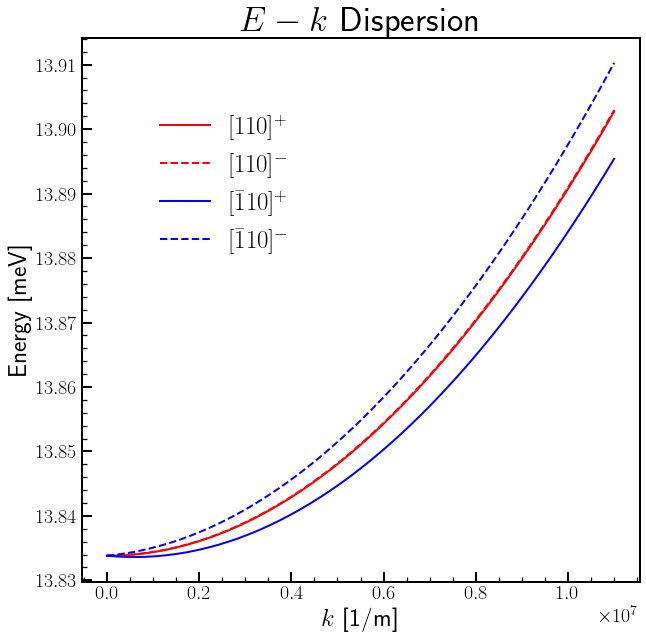

In [14]:
sample="Example"


file_path='%s_ZMas_-110_Dispersion.dat'%(sample)
data=np.loadtxt(file_path) 

K=np.zeros(int(((data.size)/2)))
K[:]+=(data[:,0])

DispMasm110=np.zeros((K.size))
DispMasm110[:]=data[:,1]

file_path='%s_ZMenos_-110_Dispersion.dat'%(sample)
data=np.loadtxt(file_path) 

DispMenosm110=np.zeros((K.size))
DispMenosm110[:]=data[:,1]

file_path='%s_ZMenos_110_Dispersion.dat'%(sample)
data=np.loadtxt(file_path) 

DispMenos110=np.zeros((K.size))
DispMenos110[:]=data[:,1]

file_path='%s_ZMas_110_Dispersion.dat'%(sample)
data=np.loadtxt(file_path) 

DispMas110=np.zeros((K.size))
DispMas110[:]=data[:,1]










fig = plt.figure(figsize=(10,10))
spec = gridspec.GridSpec(1,1)
ax  = fig.add_subplot(spec[0])

ax.plot(K,1e3*(DispMas110)/q, lw = 2, color = 'r',label = r'$[110]^{+}$')
ax.plot(K,1e3*(DispMenos110)/q, ls='--', lw = 2, color = 'r',label = r'$[110]^{-}$')
ax.plot(K,1e3*(DispMasm110)/q, lw = 2, color = 'b',label = r'$[\bar{1}10]^{+}$')
ax.plot(K,1e3*(DispMenosm110)/q, ls='--', lw = 2, color = 'b',label = r'$[\bar{1}10]^{-}$')



ax.set_title(r"$E-k$ Dispersion", fontsize=35)
ax.set_xlabel('$k$ [1/m]',fontsize = 25)
ax.set_ylabel(r'Energy [meV]',fontsize =25)
ax.minorticks_on()
ax.ticklabel_format(style='sci', axis='y')
ax.tick_params(axis='both',which='minor',direction='in',length=5,width=1.25,labelsize=20)
ax.legend(fontsize=25,frameon=False,loc=2,bbox_to_anchor=(0.1,0.9))
#ax.tick_params(axis='y',which='both',right=False,left=False,labelright=False,labelleft=False)

plt.savefig('Dispersion_Example.pdf',dpi=300,bbox_inches='tight', pad_inches=0.1) 
plt.show()